In [1]:
import networkx as nx
import sqlite3
import pandas as pd
import numpy as np

In [2]:
conn = sqlite3.connect("airbnb_dirty-csv.openrefine-2.db")

cursor = conn.cursor()

In [3]:
cc_ids = list(cursor.execute("SELECT * from col_dependency"))

In [4]:
def clean_dot(x):
    if x==-1:
        return "start"  
    elif x==-2:
        return "removed"
    else:
        return x

In [5]:
col_graph = nx.MultiDiGraph()
for x in cc_ids:
    col_graph.add_edge(clean_dot(x[2]),clean_dot(x[1]),state=x[0])

In [6]:
!which python

/opt/anaconda3/bin/python


In [7]:
from matplotlib import pyplot as plt

In [8]:
col_graph.edges()

OutMultiEdgeDataView([(8, 26), (8, 8), (8, 8), (17, 26), (17, 17), (17, 17), (17, 17), (17, 18), (3, 3), (3, 3), (3, 3), (3, 20), (3, 19), (6, 5), (6, 'removed'), (6, 6), (5, 6), (5, 16), (5, 5), (5, 5), (19, 19), (19, 19), (19, 19), (19, 19), (18, 18), (18, 18), (18, 18), (18, 18), (18, 18), (16, 16), (16, 16), (16, 16), (16, 17), (20, 20), (20, 20), (23, 23), (23, 23), (23, 23), (22, 22), (22, 22), (22, 22), (22, 23), (10, 25), (10, 10), (9, 24), (9, 9), (1, 22), (1, 1), (1, 1), (12, 21), (12, 12), (15, 15), (14, 14), (13, 13), (11, 11), (7, 7), (2, 2), ('start', 0), ('start', 1), ('start', 2), ('start', 3), ('start', 4), ('start', 5), ('start', 8), ('start', 6), ('start', 7), ('start', 9), ('start', 10), ('start', 11), ('start', 12), ('start', 13), ('start', 14), ('start', 15)])

In [9]:
nx.get_edge_attributes(col_graph,"state")

{(8, 26, 0): 0,
 (8, 8, 0): 51,
 (8, 8, 1): 52,
 (17, 26, 0): 0,
 (17, 17, 0): 11,
 (17, 17, 1): 12,
 (17, 17, 2): 38,
 (17, 18, 0): 37,
 (3, 3, 0): 4,
 (3, 3, 1): 55,
 (3, 3, 2): 56,
 (3, 20, 0): 32,
 (3, 19, 0): 32,
 (6, 5, 0): 7,
 (6, 'removed', 0): 31,
 (6, 6, 0): 49,
 (5, 6, 0): 7,
 (5, 16, 0): 41,
 (5, 5, 0): 53,
 (5, 5, 1): 54,
 (19, 19, 0): 8,
 (19, 19, 1): 9,
 (19, 19, 2): 17,
 (19, 19, 3): 18,
 (18, 18, 0): 10,
 (18, 18, 1): 33,
 (18, 18, 2): 34,
 (18, 18, 3): 35,
 (18, 18, 4): 36,
 (16, 16, 0): 13,
 (16, 16, 1): 14,
 (16, 16, 2): 40,
 (16, 17, 0): 39,
 (20, 20, 0): 15,
 (20, 20, 1): 16,
 (23, 23, 0): 19,
 (23, 23, 1): 20,
 (23, 23, 2): 25,
 (22, 22, 0): 21,
 (22, 22, 1): 22,
 (22, 22, 2): 27,
 (22, 23, 0): 26,
 (10, 25, 0): 23,
 (10, 10, 0): 46,
 (9, 24, 0): 24,
 (9, 9, 0): 47,
 (1, 22, 0): 28,
 (1, 1, 0): 57,
 (1, 1, 1): 58,
 (12, 21, 0): 29,
 (12, 12, 0): 30,
 (15, 15, 0): 42,
 (14, 14, 0): 43,
 (13, 13, 0): 44,
 (11, 11, 0): 45,
 (7, 7, 0): 48,
 (2, 2, 0): 50,
 ('start', 

In [10]:
col_graph.edges(data=True)

OutMultiEdgeDataView([(8, 26, {'state': 0}), (8, 8, {'state': 51}), (8, 8, {'state': 52}), (17, 26, {'state': 0}), (17, 17, {'state': 11}), (17, 17, {'state': 12}), (17, 17, {'state': 38}), (17, 18, {'state': 37}), (3, 3, {'state': 4}), (3, 3, {'state': 55}), (3, 3, {'state': 56}), (3, 20, {'state': 32}), (3, 19, {'state': 32}), (6, 5, {'state': 7}), (6, 'removed', {'state': 31}), (6, 6, {'state': 49}), (5, 6, {'state': 7}), (5, 16, {'state': 41}), (5, 5, {'state': 53}), (5, 5, {'state': 54}), (19, 19, {'state': 8}), (19, 19, {'state': 9}), (19, 19, {'state': 17}), (19, 19, {'state': 18}), (18, 18, {'state': 10}), (18, 18, {'state': 33}), (18, 18, {'state': 34}), (18, 18, {'state': 35}), (18, 18, {'state': 36}), (16, 16, {'state': 13}), (16, 16, {'state': 14}), (16, 16, {'state': 40}), (16, 17, {'state': 39}), (20, 20, {'state': 15}), (20, 20, {'state': 16}), (23, 23, {'state': 19}), (23, 23, {'state': 20}), (23, 23, {'state': 25}), (22, 22, {'state': 21}), (22, 22, {'state': 22}), (22

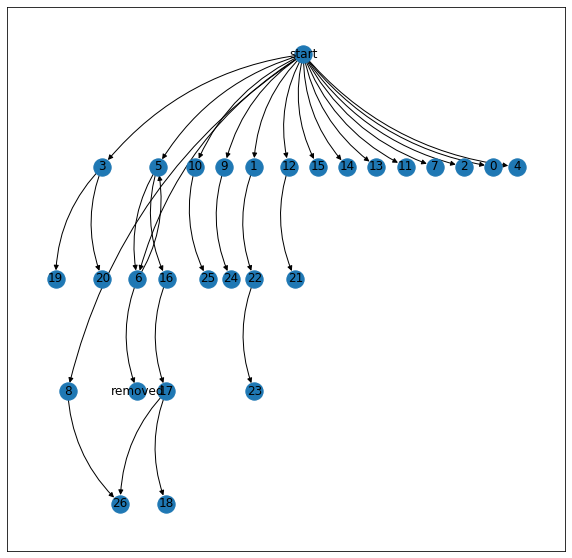

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
pos = nx.nx_pydot.graphviz_layout(col_graph,prog="dot")
#nx.draw_networkx(col_graph,pos=pos,connectionstyle='arc3, rad = 0.2')
edge_labels=dict([((u,v,),d['state'])
             for u,v,d in col_graph.edges(data=True)])
nx.draw_networkx(col_graph,pos=pos,connectionstyle='arc3, rad = 0.2')
#nx.draw_networkx_edge_labels(col_graph, pos, edge_labels=edge_labels,connectionstyle='arc3, rad = 0.2')
plt.show()

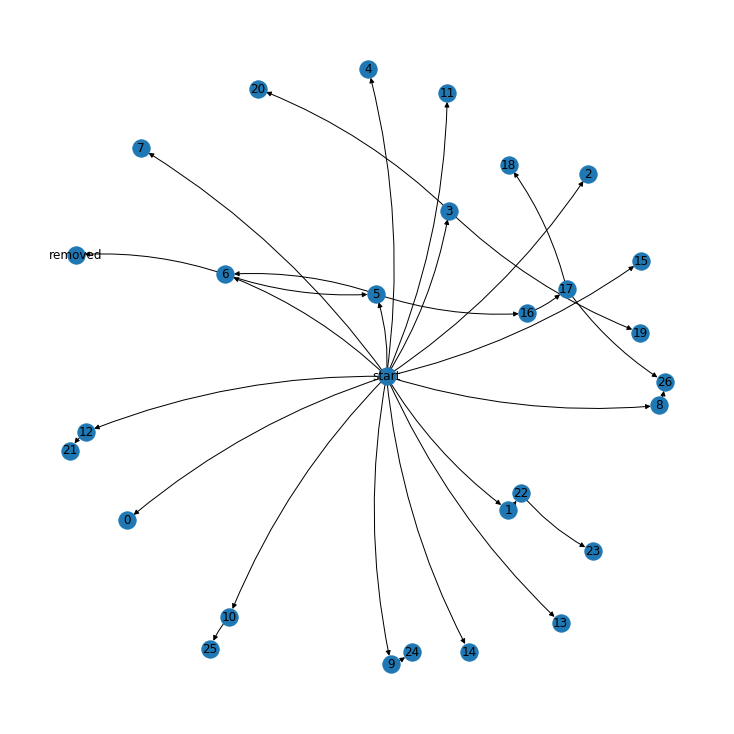

In [12]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(col_graph)
nx.draw(col_graph, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['state'])
             for u,v,d in col_graph.edges(data=True)])


In [13]:
import clingo
class Context:
    def id(self, x):
        return x
    def seq(self, x, y):
        return [x, y]

def on_model(m):
    print(m)

ctl = clingo.Control()
ctl.add("base", [], """\
p(@id(10)).
q(@seq(1,2)).
""")
ctl.ground([("base", [])], context=Context())
ctl.solve(on_model=on_model)

p(10) q(1) q(2)


SAT

In [14]:
!pwd

/Users/nnp2/Documents/projects/openrefine


In [15]:
import sys
import clingo

class Application:
    def __init__(self, name):
        self.program_name = name

    def main(self, ctl, files):
        if len(files) > 0:
            for f in files:
                ctl.load(f)
        else:
            ctl.load("-")
        ctl.ground([("base", [])])
        #ctl.solve()
        ctl.solve(on_model=on_model)

clingo.clingo_main(Application("03_poster_demo.openrefine.extract/facts.pl"), "")

10

In [16]:
ctl = clingo.Control()
#with open("03_poster_demo.openrefine.extract/facts.pl","r") as files:
#    for f in files:
ctl.load("03_poster_demo.openrefine.extract/facts.pl")
ctl.add("base",[],"""
#show cell/1.
""")

In [17]:
ctl.solve(on_model=on_model)

SAT

In [18]:
from clyngor import ASP, solve

answers = ASP("""
rel(a,(c;d)). rel(b,(d;e)).
obj(X):- rel(X,_) ; rel(X,Y): att(Y).
att(Y):- rel(_,Y) ; rel(X,Y): obj(X).
:- not obj(X):obj(X).
:- not att(Y):att(Y).
""")
for answer in answers:
    print(answer)


frozenset({('att', ('d',)), ('rel', ('b', 'd')), ('rel', ('b', 'e')), ('obj', ('b',)), ('rel', ('a', 'c')), ('obj', ('a',)), ('rel', ('a', 'd'))})
frozenset({('att', ('d',)), ('rel', ('b', 'd')), ('rel', ('b', 'e')), ('rel', ('a', 'c')), ('obj', ('a',)), ('rel', ('a', 'd')), ('att', ('c',))})
frozenset({('att', ('d',)), ('rel', ('b', 'd')), ('rel', ('b', 'e')), ('obj', ('b',)), ('rel', ('a', 'c')), ('att', ('e',)), ('rel', ('a', 'd'))})


In [19]:
answers = solve('03_poster_demo.openrefine.extract/facts.pl'); # also accepts an iterable of file

In [20]:
for answer in answers.by_predicate:
    print(answer["row_position"],answer["cell"])
    #print(answer)

frozenset({(3, 1, 1, -1), (2, 2, -1, 1), (5, 2, 1, 0), (1, 1, -1, 0), (0, 0, -1, -1), (4, 0, 1, 1)}) frozenset({(1, 1, 0), (8, 2, 2), (2, 2, 0), (7, 1, 2), (0, 0, 0), (4, 1, 1), (5, 2, 1), (3, 0, 1), (6, 0, 2)})


In [21]:
for x in answers:
    print(x)

In [22]:
import clyngor

In [23]:
answers = clyngor.solve(["03_poster_demo.openrefine.extract/facts.pl","rules/column_query.pl"],inline="""
state(N) :- N=1.
#show q1/1.
""")
for x in answers:
    print(x)

frozenset({('q1', ('"03_poster_demo.openrefine.tar.gz"',))})


In [24]:
answers = clyngor.solve(["03_poster_demo.openrefine.extract/facts.pl","rules/column_query.pl"],inline="""
state(N) :- N=1.
all_column_schema_at_before_state_test(A,B) :-
    all_column_schema_at_before_state(A,B),
    state(B).
all_column_schema_at_state_test(A,B,C) :-
    all_column_schema_at_state(A,B,C),
    state(C).    
#show column_order/1.    
""")
for x in answers:
    print(x)

frozenset({('column_order', (('cons', (('col_name', (-1, 0, '"Title"')), 3, ('cons', (('col_name', (0, 1, '"Author"')), 2, ('cons', (('col_name', (1, 2, '"Date"')), 1, 'empty')))))),))})


# Show me the state dependency

In [25]:
import clyngor
facts_file = "03_poster_demo.openrefine.extract/facts.pl"
dname = "03_poster_demo.openrefine.tar.gz"
#facts_file="airbnb_dirty-csv.openrefine-2.extract/facts.pl"
#dname = "airbnb_dirty-csv.openrefine-2.tar.gz"
def state_dependency(facts_file,dname):
    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""
    dataset_name(N) :- N="{dname}".
    state(N) :- N=-1.
    #show state_edge/2.
    """.format(dname=dname))

    state_graph = nx.DiGraph()

    for x in answers.by_predicate:
        #print(x["all_column_name_at_state_test"])
        for y in x["state_edge"]:
            #print(y[0][1],y[0][2])
            #print(y[0])
            #print(y[1])            
            #state_graph.add_node(y[0][1],col_name=y[2],col_schema_id=y[4])
            state_graph.add_edge(y[0][1][0],y[0][1][1],op_name=y[0][1][2])
            state_graph.add_edge(y[1][1][0],y[1][1][1],op_name=y[1][1][2])

    #print(state_graph.edges)
    state_path = nx.dag_longest_path(state_graph)
    #print(state_path)
    #state_name = nx.get_edge_attributes(state_graph)
    #print(state_name)
    state_schema = []
    state_names = nx.get_edge_attributes(state_graph,"op_name")
    for i,x in enumerate(state_path[:-1]):
        #col_schema.append((x,col_name[x]))            
        state_schema.append((state_path[i],state_names[(x,state_path[i+1])]))
        #print(state_name)

    state_schema.append((state_path[i+1],"original"))


    #print(state_schema)
    return state_schema
state_schema = state_dependency(facts_file,dname)
state_schema
    

[(-1, '"com.google.refine.model.changes.ColumnMoveChange"'),
 (0, '"com.google.refine.model.changes.RowReorderChange"'),
 (1, '"com.google.refine.model.changes.CellChange"'),
 (2, '"com.google.refine.model.changes.CellChange"'),
 (3, '"com.google.refine.model.changes.CellChange"'),
 (4, '"com.google.refine.model.changes.ColumnRenameChange"'),
 (5, 'original')]

## What are the column names and orders at state ?

In [26]:
#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
facts_file="airbnb_dirty-csv.openrefine-2.extract/facts.pl"
dname = "airbnb_dirty-csv.openrefine-2.tar.gz"

def col_schema_at_state(facts_file,dname,state):
    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""
    dataset_name(N) :- N="{dname}".
    state(N) :- N={state}.
    all_column_schema_at_before_state_test(A,B) :-
        all_column_schema_at_before_state(A,B),
        state(B).
    all_column_schema_at_state_test(A,B,C) :-
        all_column_schema_at_state(A,B,C),
        state(C).    
    #show all_column_name_at_state_test/5.    
    """.format(state=state,dname=dname))

    col_graph = nx.DiGraph()
    for x in answers.by_predicate:
        #print(x["all_column_name_at_state_test"])
        for y in x["all_column_name_at_state_test"]:
            #print(y)
            col_graph.add_node(y[1],col_name=y[2],col_schema_id=y[4])
            col_graph.add_edge(y[3],y[1])
    col_path = nx.dag_longest_path(col_graph)
    col_name = nx.get_node_attributes(col_graph,"col_name")
    col_schema = []
    for x in col_path[1:]:
        col_schema.append((x,col_name[x]))
    return col_schema
col_schema = col_schema_at_state(facts_file,dname,2)
col_schema
    

[(0, '"id"'),
 (1, '"name"'),
 (22, '"name_grel"'),
 (23, '"name_grel_star"'),
 (2, '"host_id"'),
 (19, '"host_name 1 test"'),
 (3, '"host_name"'),
 (20, '"host_name 2"'),
 (5, '"neighbourhood"'),
 (16, '"neighbourhood_case"'),
 (17, '"neighbourhood_loop"'),
 (26, '"test_combine"'),
 (18, '"neighbourhood_cluster"'),
 (6, '"latitude"'),
 (7, '"longitude"'),
 (8, '"room_type"'),
 (9, '"price"'),
 (24, '"price_crazy"'),
 (10, '"minimum_nights"'),
 (25, '"minimum_nights_long"'),
 (11, '"number_of_reviews"'),
 (12, '"last_review"'),
 (21, '"last_review_timeless"'),
 (13, '"reviews_per_month"'),
 (14, '"calculated_host_listings_count"'),
 (15, '"availability_365"')]

In [27]:
#facts_file="airbnb_dirty-csv.openrefine-2.extract/facts.pl"
facts_file="airbnb_dirty-csv.openrefine-2.extract/facts.pl"
dname = "airbnb_dirty-csv.openrefine-2.tar.gz"


def row_order_at_state(facts_file,dname,state):
    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".
    #show row_position_at_state_test/4.
    """.format(state=state,dname=dname))

    row_graph = nx.DiGraph()
    for x in answers.by_predicate:
        for y in x["row_position_at_state_test"]:
            #print(y)
            row_graph.add_node(y[1],row_schema_id=y[0])
            row_graph.add_edge(y[3],y[1])
    row_path = nx.dag_longest_path(row_graph)
    row_order = []
    for x in row_path[1:]:
        row_order.append(x)
    return row_order

row_order = row_order_at_state(facts_file,dname,2)
row_order
    

[0,
 1,
 7592,
 7593,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182

### What are the column values at state ?

In [28]:
#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
#dname = "03_poster_demo.openrefine.extract.tar.gz"
facts_file = "airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
dname = "airbnb_dirty-csv.openrefine-2.tar.gz"

import numpy as np
def cell_content_at_state(facts_file,dname,state):
    print("col_order")
    col_schema = col_schema_at_state(facts_file,dname,state)
    print("row_order")
    row_order = row_order_at_state(facts_file,dname,state)

    answers = clyngor.solve([facts_file,"rules/column_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".

    content(-1,nul,nul,nul,nul).

    change_content_at_before_state(PrevContentId, StateId) :-
        content(ContentId, _, NextColumnSchemaStateId, _, PrevContentId),
        NextColumnSchemaStateId <= StateId,
        state_num(StateId).

    change_content_at_state(ContentId, CellId, StateId) :-
        content(ContentId, CellId, AssignmentStateId, _, _),
        StateId >= AssignmentStateId,
        not change_content_at_before_state(ContentId, StateId),
        state_num(StateId).

    change_count_at_before_state(B) :- content(A,B,N,_,_),
        state(N).

    change_count_at_state(B) :- content(A,B,N,_,_),
        state(N).

    change_content_at_state_test(ContentId, CellId, ColNum, RowNum, StateId) :-
        change_content_at_state(ContentId, CellId, StateId),
        cell(CellId,ColNum,RowNum),
        state(StateId).

    #show change_content_at_state_test/5.
    """.format(state=state,dname=dname))
    #print(list(answers))

    #col_graph = nx.DiGraph()

    col_len = len(col_schema)
    row_len = len(row_order)

    temp_table = np.empty((row_len,col_len),dtype=object)

    log_col = {}
    col_name = np.empty(col_len,dtype=object)
    for i,x in enumerate(col_schema):
        log_col[x[0]]=i
        col_name[x[0]] = eval(x[1])
    log_row = {}
    for i,x in enumerate(row_order):
        log_row[x]=i
    #print(row_order)
    #print(temp_table.shape)
    for x in answers.by_predicate:
        #print(x)
        #print(x["all_column_name_at_state_test"])
        for y in x["change_content_at_state_test"]:
            #print(y)
            #print(y[3],y[2],y[4])
            temp_table[log_row[y[3]],log_col[y[2]]] = eval(y[0])
    
    temp_pd = pd.DataFrame(temp_table)
    temp_pd.columns = col_name

    return temp_pd

cell_content_at_state(facts_file,dname,5)
    

col_order


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nnp2/Documents/projects/openrefine/03_poster_demo.openrefine.extract/facts_content_excluded.pl'

In [33]:
#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
#dname = "03_poster_demo.openrefine.extract.tar.gz"
facts_file = "03_poster_demo.openrefine.extract/facts.pl"
dname = "03_poster_demo.openrefine.tar.gz"

import numpy as np
def cell_content_at_state(facts_file,dname,state):
    col_schema = col_schema_at_state(facts_file,dname,state)
    row_order = row_order_at_state(facts_file,dname,state)

    answers = clyngor.solve([facts_file,"rules/column_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".

    content(-1,nul,nul,nul,nul).

    change_content_at_before_state(PrevContentId, StateId) :-
        content(ContentId, _, NextColumnSchemaStateId, _, PrevContentId),
        NextColumnSchemaStateId <= StateId,
        state_num(StateId).

    change_content_at_state(ContentId, CellId, StateId) :-
        content(ContentId, CellId, AssignmentStateId, _, _),
        StateId >= AssignmentStateId,
        not change_content_at_before_state(ContentId, StateId),
        state_num(StateId).

    change_count_at_before_state(B) :- content(A,B,N,_,_),
        state(N).

    change_count_at_state(B) :- content(A,B,N,_,_),
        state(N).

    change_content_at_state_test(ContentId, CellId, ColNum, RowNum, Value, StateId) :-
        change_content_at_state(ContentId, CellId, StateId),
        value(ValueId,Value),
        cell(CellId,ColNum,RowNum),
        content(ContentId,_,_,ValueId,_),
        state(StateId).

    #show change_content_at_state_test/6.
    """.format(state=state,dname=dname))
    #print(list(answers))

    #col_graph = nx.DiGraph()

    col_len = len(col_schema)
    row_len = len(row_order)

    temp_table = np.empty((row_len,col_len),dtype=object)

    log_col = {}
    col_name = np.empty(col_len,dtype=object)
    for i,x in enumerate(col_schema):
        log_col[x[0]]=i
        col_name[x[0]] = eval(x[1])
    log_row = {}
    for i,x in enumerate(row_order):
        log_row[x]=i
    #print(row_order)
    #print(temp_table.shape)
    for x in answers.by_predicate:
        #print(x)
        #print(x["all_column_name_at_state_test"])
        for y in x["change_content_at_state_test"]:
            #print(y)
            #print(y[3],y[2],y[4])
            temp_table[log_row[y[3]],log_col[y[2]]] = eval(y[4])
    
    temp_pd = pd.DataFrame(temp_table)
    temp_pd.columns = col_name

    return temp_pd

cell_content_at_state(facts_file,dname,5)
    

,Book Title,Author,Date
0,Against Method,Paul Feyerabend,1975
1,Changing Order,H.M. Collins,1985
2,Exceeding Our Grasp,P. Kyle Stanford,2006


In [34]:
facts_file = "03_poster_demo.openrefine.extract/facts.pl"
dname = "03_poster_demo.openrefine.tar.gz"

state_schema = state_dependency(facts_file,dname)
for x in state_schema[::-1]:
    print(x)
    print(cell_content_at_state(facts_file,dname,x[0]))


(5, 'original')
            Book Title             Author   Date
0       Against Method    Paul Feyerabend   1975
1       Changing Order       H.M. Collins   1985
2  Exceeding Our Grasp   P. Kyle Stanford   2006
(4, '"com.google.refine.model.changes.ColumnRenameChange"')
                 Title             Author   Date
0       Against Method    Paul Feyerabend   1975
1       Changing Order       H.M. Collins   1985
2  Exceeding Our Grasp   P. Kyle Stanford   2006
(3, '"com.google.refine.model.changes.CellChange"')
                 Title             Author   Date
0       Against Method      Feyerabend, P   1975
1       Changing Order       H.M. Collins   1985
2  Exceeding Our Grasp   P. Kyle Stanford   2006
(2, '"com.google.refine.model.changes.CellChange"')
                 Title             Author   Date
0       Against Method      Feyerabend, P   1975
1       Changing Order      Collins, H.M.   1985
2  Exceeding Our Grasp   P. Kyle Stanford   2006
(1, '"com.google.refine.model.change

In [32]:
#facts_file="airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
def row_order_at_state(facts_file,dname,state):
    answers = clyngor.solve([facts_file,"rules/column_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".
    #show row_position_at_state_test/4.
    """.format(state=state,dname=dname))

    row_graph = nx.DiGraph()
    for x in answers.by_predicate:
        for y in x["row_position_at_state_test"]:
            #print(y)
            row_graph.add_node(y[1],row_schema_id=y[0])
            row_graph.add_edge(y[3],y[1])
    row_path = nx.dag_longest_path(row_graph)
    row_order = []
    for x in row_path[1:]:
        row_order.append(x)
    return row_order

row_order = row_order_at_state(facts_file,dname,2)
row_order
    

In [114]:
conn = sqlite3.connect("airbnb_dirty-csv.openrefine-2.db")
cursor = conn.cursor()

## number of cell changes for each state

In [131]:
cts = list(cursor.execute("SELECT b.state_id,b.command,count(1) from content a,state_command b  where a.state_id >= 0 and a.state_id=b.state_id group by b.state_id order by b.state_id desc"))
#cts = list(cursor.execute("SELECT * from content"))
cts

[(57, 'com.google.refine.model.changes.MassCellChange', 210),
 (56, 'com.google.refine.model.changes.MassCellChange', 6),
 (55, 'com.google.refine.model.changes.MassCellChange', 11),
 (50, 'com.google.refine.model.changes.MassCellChange', 7594),
 (49, 'com.google.refine.model.changes.MassCellChange', 7594),
 (48, 'com.google.refine.model.changes.MassCellChange', 7594),
 (47, 'com.google.refine.model.changes.MassCellChange', 7594),
 (46, 'com.google.refine.model.changes.MassCellChange', 7594),
 (45, 'com.google.refine.model.changes.MassCellChange', 7594),
 (44, 'com.google.refine.model.changes.MassCellChange', 6698),
 (43, 'com.google.refine.model.changes.MassCellChange', 7594),
 (42, 'com.google.refine.model.changes.MassCellChange', 7594),
 (40, 'com.google.refine.model.changes.MassCellChange', 898),
 (36, 'com.google.refine.model.changes.MassCellChange', 6),
 (35, 'com.google.refine.model.changes.MassCellChange', 10),
 (34, 'com.google.refine.model.changes.MassCellChange', 6),
 (33, '

## number of cell changes from state a to state b

In [134]:
a = 1
b = 25
cts = list(cursor.execute("SELECT count(*) from content where state_id >= ? and state_id <= ?",(int(a),int(b))))
#cts = list(cursor.execute("SELECT * from content"))
cts

[(1301,)]

## number of unique cell changes from state a to state b

In [135]:
cts = list(cursor.execute("SELECT count(1) from (SELECT distinct cell_id from content where state_id >= ? and state_id <= ?)",(int(a),int(b))))
#cts = list(cursor.execute("SELECT * from content"))
cts

[(1262,)]

## Number of columns involved in each state

In [140]:
cts = list(cursor.execute("""
    SELECT distinct a.input_column from (
    SELECT input_column from col_dependency where state_id >= ? and state_id <= ? 
    union 
    SELECT output_column from col_dependency  where state_id >= ? and state_id <= ?
    ) a
    """,(int(a),int(b),int(a),int(b))))
#cts = list(cursor.execute("SELECT * from content"))
cts,len(cts)

([(3,),
  (5,),
  (6,),
  (9,),
  (10,),
  (16,),
  (17,),
  (18,),
  (19,),
  (20,),
  (22,),
  (23,),
  (24,),
  (25,)],
 14)

In [90]:
state = 0
answers = clyngor.solve(["03_poster_demo.openrefine.extract/facts.pl","rules/column_query.pl"],inline="""
state(N) :- N={state}.

content(-1,nul,nul,nul,nul).

change_content_at_before_state(PrevContentId, StateId) :-
    content(ContentId, _, NextColumnSchemaStateId, _, PrevContentId),
    NextColumnSchemaStateId <= StateId,
    state_num(StateId).

change_content_at_state(ContentId, CellId, StateId) :-
    content(ContentId, CellId, AssignmentStateId, _, _),
    StateId >= AssignmentStateId,
    not change_content_at_before_state(ContentId, StateId),
    state_num(StateId).

change_count_at_before_state(B) :- content(A,B,N,_,_),
    state(N).

change_count_at_state(B) :- content(A,B,N,_,_),
    state(N).

change_content_at_state_test(ContentId, CellId, ColNum, RowNum, Value, StateId) :-
    change_content_at_state(ContentId, CellId, StateId),
    value(ValueId,Value),
    cell(CellId,ColNum,RowNum),
    content(ContentId,_,_,ValueId,_),
    state(StateId).

#show change_content_at_state_test/6.
""".format(state=state))

col_graph = nx.DiGraph()
for x in answers.by_predicate:
    #print(x["all_column_name_at_state_test"])
    for y in x["change_content_at_state_test"]:
        print(y)
        #col_graph.add_node(y[1],col_name=y[2],col_schema_id=y[4])
        #col_graph.add_edge(y[3],y[1])
#col_path = nx.dag_longest_path(col_graph)
#col_name = nx.get_node_attributes(col_graph,"col_name")
#for x in col_path[1:]:
#    print(col_name[x])
    

(0, 0, 0, 0, '"Changing Order"', 0)
(6, 6, 0, 2, '"Exceeding Our Grasp"', 0)
(7, 7, 1, 2, '"Stanford, P.K."', 0)
(1, 1, 1, 0, '"Collins, H.M."', 0)
(4, 4, 1, 1, '"Feyerabend, P"', 0)
(2, 2, 2, 0, '" 1985"', 0)
(5, 5, 2, 1, '" 1975"', 0)
(8, 8, 2, 2, '" 2006"', 0)
(3, 3, 0, 1, '"Against Method"', 0)


In [251]:
nx.get_node_attributes(col_graph,"col_schema_id")

{2: 3, 1: 4, 0: 5}

[-1, 0, 1, 2]